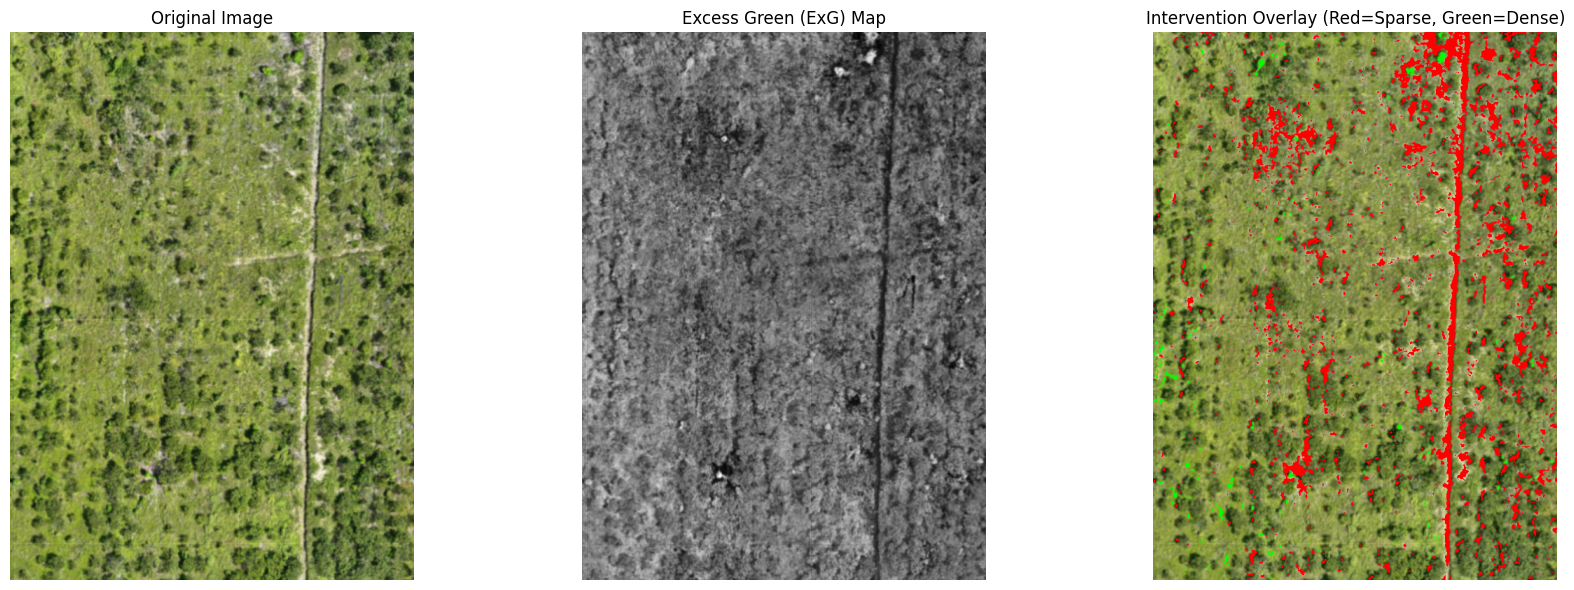

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = "./data/low.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate "greenness" proxy using Excess Green (ExG)
# ExG = 2 * G - R - B
R, G, B = image_rgb[:, :, 0], image_rgb[:, :, 1], image_rgb[:, :, 2]
exg = 2 * G.astype(np.int16) - R.astype(np.int16) - B.astype(np.int16)

# Normalize to 0–255
exg_normalized = cv2.normalize(exg, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Thresholds
_, sparse_mask = cv2.threshold(exg_normalized, 60, 255, cv2.THRESH_BINARY_INV)  # Sparse or dry
_, dense_mask = cv2.threshold(exg_normalized, 180, 255, cv2.THRESH_BINARY)       # Dense/overgrown

# Create overlay masks
overlay = image_rgb.copy()
overlay[sparse_mask > 0] = [255, 0, 0]   # Mark sparse vegetation in red
overlay[dense_mask > 0] = [0, 255, 0]    # Mark dense/overgrown vegetation in green

# Visualization
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[1].imshow(exg_normalized, cmap="gray")
ax[1].set_title("Excess Green (ExG) Map")
ax[2].imshow(overlay)
ax[2].set_title("Intervention Overlay (Red=Sparse, Green=Dense)")

for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()


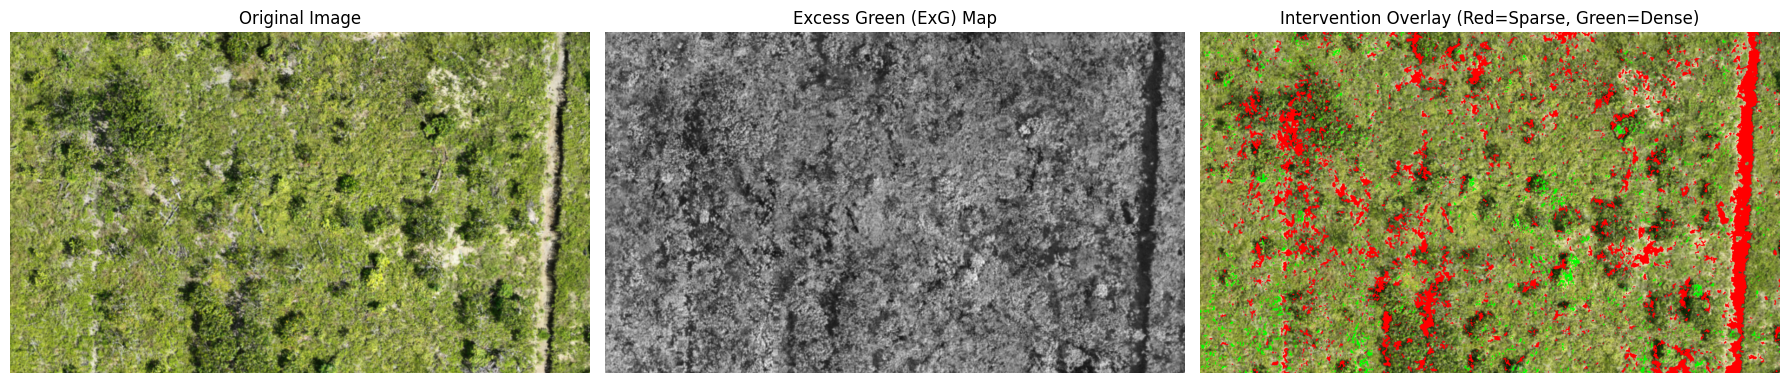

In [5]:
# Load image
image_path = "./data/high.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate "greenness" proxy using Excess Green (ExG)
# ExG = 2 * G - R - B
R, G, B = image_rgb[:, :, 0], image_rgb[:, :, 1], image_rgb[:, :, 2]
exg = 2 * G.astype(np.int16) - R.astype(np.int16) - B.astype(np.int16)

# Normalize to 0–255
exg_normalized = cv2.normalize(exg, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Thresholds
_, sparse_mask = cv2.threshold(exg_normalized, 60, 255, cv2.THRESH_BINARY_INV)  # Sparse or dry
_, dense_mask = cv2.threshold(exg_normalized, 180, 255, cv2.THRESH_BINARY)       # Dense/overgrown

# Create overlay masks
overlay = image_rgb.copy()
overlay[sparse_mask > 0] = [255, 0, 0]   # Mark sparse vegetation in red
overlay[dense_mask > 0] = [0, 255, 0]    # Mark dense/overgrown vegetation in green

# Visualization
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[1].imshow(exg_normalized, cmap="gray")
ax[1].set_title("Excess Green (ExG) Map")
ax[2].imshow(overlay)
ax[2].set_title("Intervention Overlay (Red=Sparse, Green=Dense)")

for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()


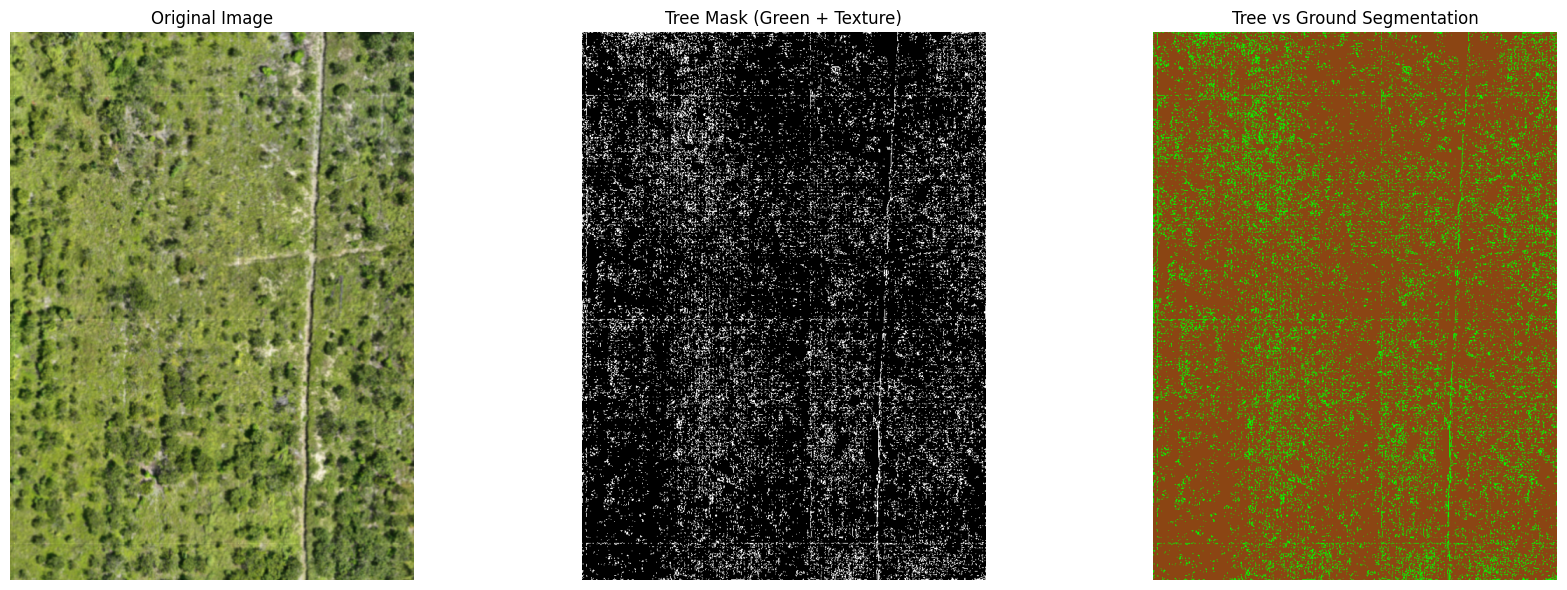

In [6]:
# Load and check image
image_path = "./data/low.png"
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Convert to RGB and HSV
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSV threshold for green vegetation (tweak as needed)
lower_green = np.array([30, 40, 40])
upper_green = np.array([90, 255, 255])
vegetation_mask = cv2.inRange(image_hsv, lower_green, upper_green)

# Morphological filtering to remove noise
kernel = np.ones((5, 5), np.uint8)
vegetation_mask = cv2.morphologyEx(vegetation_mask, cv2.MORPH_OPEN, kernel)
vegetation_mask = cv2.morphologyEx(vegetation_mask, cv2.MORPH_CLOSE, kernel)

# Optional: Apply texture filtering to detect dense vegetation (tree crowns)
# Use Laplacian (edge density proxy)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian_abs = np.uint8(np.absolute(laplacian))
_, texture_mask = cv2.threshold(laplacian_abs, 20, 255, cv2.THRESH_BINARY)

# Combine color + texture to isolate trees
tree_mask = cv2.bitwise_and(vegetation_mask, texture_mask)

# Invert for ground (everything else)
ground_mask = cv2.bitwise_not(tree_mask)

# Visualize segmentation
tree_overlay = image_rgb.copy()
tree_overlay[tree_mask > 0] = [0, 255, 0]    # Trees in green
tree_overlay[ground_mask > 0] = [139, 69, 19]  # Ground in brown

# Show results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[1].imshow(tree_mask, cmap="gray")
ax[1].set_title("Tree Mask (Green + Texture)")
ax[2].imshow(tree_overlay)
ax[2].set_title("Tree vs Ground Segmentation")

for a in ax:
    a.axis("off")
plt.tight_layout()
plt.show()

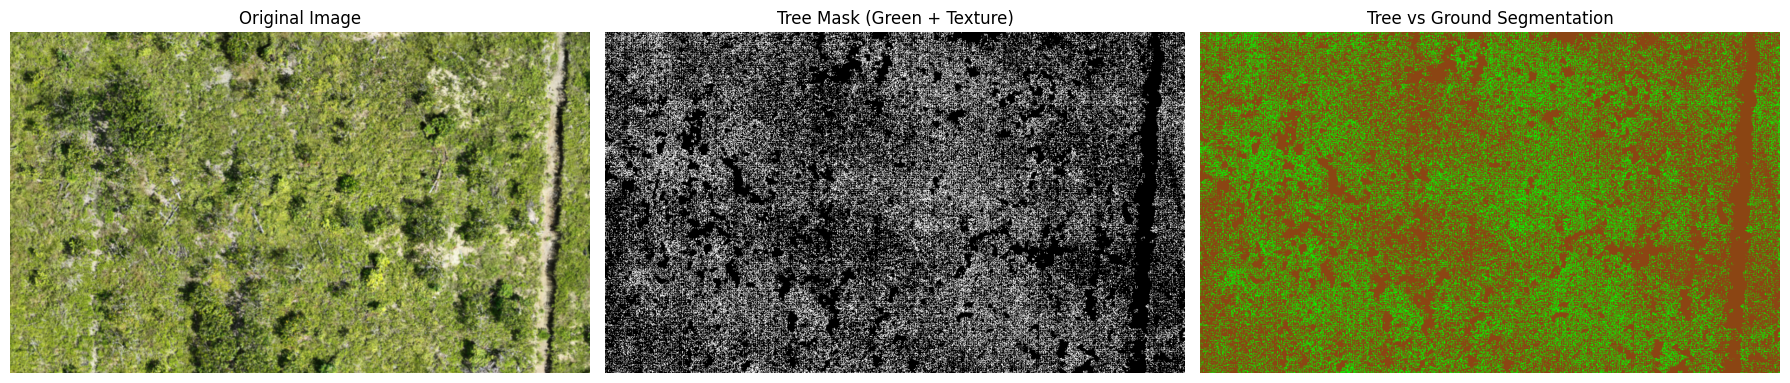

In [7]:
# Load and check image
image_path = "./data/high.png"
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Convert to RGB and HSV
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSV threshold for green vegetation (tweak as needed)
lower_green = np.array([30, 40, 40])
upper_green = np.array([90, 255, 255])
vegetation_mask = cv2.inRange(image_hsv, lower_green, upper_green)

# Morphological filtering to remove noise
kernel = np.ones((5, 5), np.uint8)
vegetation_mask = cv2.morphologyEx(vegetation_mask, cv2.MORPH_OPEN, kernel)
vegetation_mask = cv2.morphologyEx(vegetation_mask, cv2.MORPH_CLOSE, kernel)

# Optional: Apply texture filtering to detect dense vegetation (tree crowns)
# Use Laplacian (edge density proxy)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian_abs = np.uint8(np.absolute(laplacian))
_, texture_mask = cv2.threshold(laplacian_abs, 20, 255, cv2.THRESH_BINARY)

# Combine color + texture to isolate trees
tree_mask = cv2.bitwise_and(vegetation_mask, texture_mask)

# Invert for ground (everything else)
ground_mask = cv2.bitwise_not(tree_mask)

# Visualize segmentation
tree_overlay = image_rgb.copy()
tree_overlay[tree_mask > 0] = [0, 255, 0]    # Trees in green
tree_overlay[ground_mask > 0] = [139, 69, 19]  # Ground in brown

# Show results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[1].imshow(tree_mask, cmap="gray")
ax[1].set_title("Tree Mask (Green + Texture)")
ax[2].imshow(tree_overlay)
ax[2].set_title("Tree vs Ground Segmentation")

for a in ax:
    a.axis("off")
plt.tight_layout()
plt.show()

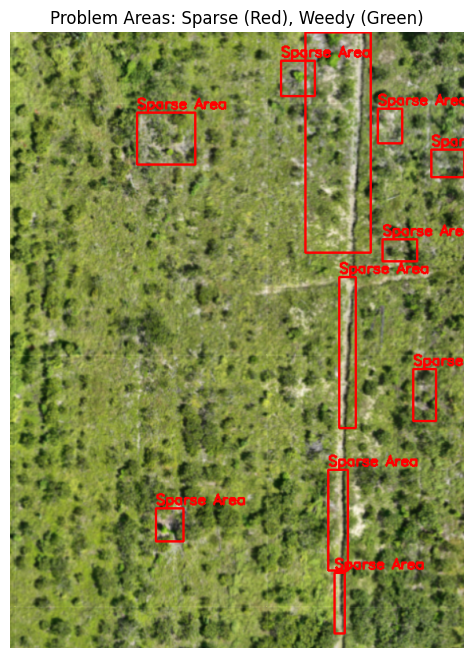

In [10]:
# Load and convert image
image_path = "./data/low.png"
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError("Image not found.")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split channels for Excess Green (ExG)
R, G, B = image_rgb[:, :, 0], image_rgb[:, :, 1], image_rgb[:, :, 2]
exg = 2 * G.astype(np.int16) - R.astype(np.int16) - B.astype(np.int16)
exg_norm = cv2.normalize(exg, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Thresholds for problematic areas
_, sparse_mask = cv2.threshold(exg_norm, 60, 255, cv2.THRESH_BINARY_INV)
_, dense_mask = cv2.threshold(exg_norm, 180, 255, cv2.THRESH_BINARY)

# Optional: texture mask for overgrown detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))
_, texture_mask = cv2.threshold(laplacian, 20, 255, cv2.THRESH_BINARY)

# Combine high greenness + texture => likely overgrown/weedy
weedy_mask = cv2.bitwise_and(dense_mask, texture_mask)

# Function to draw bounding boxes from a binary mask
def draw_boxes_from_mask(image, mask, label, color):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result = image.copy()
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 300:  # Filter small noise
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(result, (x, y), (x+w, y+h), color, 2)
            cv2.putText(result, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    return result

# Draw on image
boxed = image_rgb.copy()
boxed = draw_boxes_from_mask(boxed, sparse_mask, "Sparse Area", (255, 0, 0))       # Red
boxed = draw_boxes_from_mask(boxed, weedy_mask, "Weedy Area", (0, 255, 0))         # Green

# Show
plt.figure(figsize=(12, 8))
plt.imshow(boxed)
plt.title("Problem Areas: Sparse (Red), Weedy (Green)")
plt.axis("off")
plt.show()

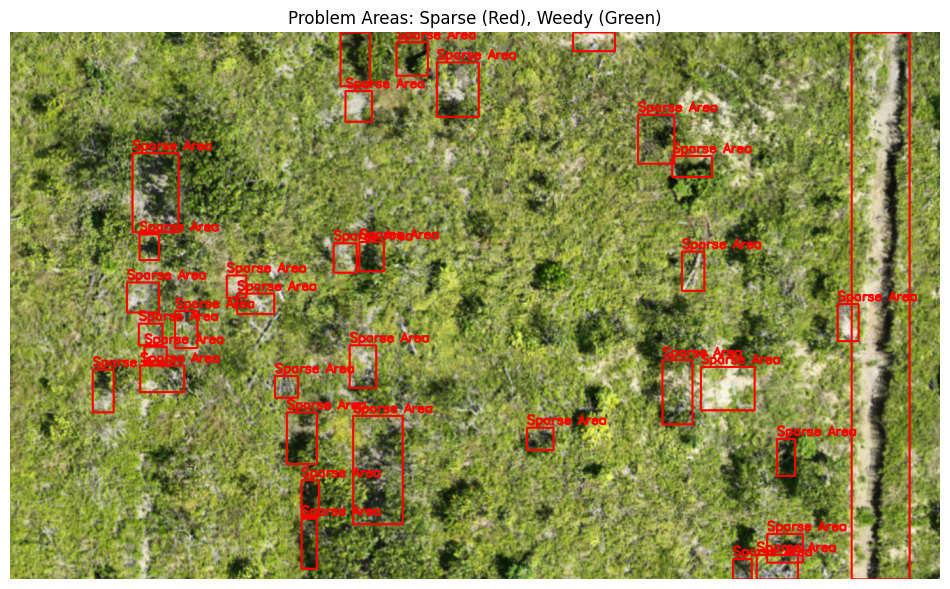

In [11]:
# Load and convert image
image_path = "./data/high.png"
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError("Image not found.")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split channels for Excess Green (ExG)
R, G, B = image_rgb[:, :, 0], image_rgb[:, :, 1], image_rgb[:, :, 2]
exg = 2 * G.astype(np.int16) - R.astype(np.int16) - B.astype(np.int16)
exg_norm = cv2.normalize(exg, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Thresholds for problematic areas
_, sparse_mask = cv2.threshold(exg_norm, 60, 255, cv2.THRESH_BINARY_INV)
_, dense_mask = cv2.threshold(exg_norm, 180, 255, cv2.THRESH_BINARY)

# Optional: texture mask for overgrown detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))
_, texture_mask = cv2.threshold(laplacian, 20, 255, cv2.THRESH_BINARY)

# Combine high greenness + texture => likely overgrown/weedy
weedy_mask = cv2.bitwise_and(dense_mask, texture_mask)

# Function to draw bounding boxes from a binary mask
def draw_boxes_from_mask(image, mask, label, color):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result = image.copy()
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 300:  # Filter small noise
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(result, (x, y), (x+w, y+h), color, 2)
            cv2.putText(result, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    return result

# Draw on image
boxed = image_rgb.copy()
boxed = draw_boxes_from_mask(boxed, sparse_mask, "Sparse Area", (255, 0, 0))       # Red
boxed = draw_boxes_from_mask(boxed, weedy_mask, "Weedy Area", (0, 255, 0))         # Green

# Show
plt.figure(figsize=(12, 8))
plt.imshow(boxed)
plt.title("Problem Areas: Sparse (Red), Weedy (Green)")
plt.axis("off")
plt.show()